<h1 style="text-align:center; color:green">CA - Introduction to Artificial Inteligence</h1>

<h3> Name: Vinicius Silva Russo </h3>
<h3>Student ID: x19108681</h3>

<h2 style="text-align:center;">Logistic Regression & K-Nearest Neighbour (K-NN)  </h2><br>

**Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold 
from sklearn.decomposition import PCA 

<br> **Loading Dataset**<br>


In [2]:
df = pd.read_csv ('HR_comma_sep.csv')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Number or rows / number of columns 

df.shape

(14999, 10)

In [4]:
# Checking uniqueness of features

for col in df.columns :
    print(" col_name : " , col , " unique percentage : " , len(df[col].unique())/len(df))

 col_name :  satisfaction_level  unique percentage :  0.006133742249483299
 col_name :  last_evaluation  unique percentage :  0.004333622241482766
 col_name :  number_project  unique percentage :  0.000400026668444563
 col_name :  average_montly_hours  unique percentage :  0.01433428895259684
 col_name :  time_spend_company  unique percentage :  0.0005333688912594173
 col_name :  Work_accident  unique percentage :  0.00013334222281485432
 col_name :  left  unique percentage :  0.00013334222281485432
 col_name :  promotion_last_5years  unique percentage :  0.00013334222281485432
 col_name :  Department  unique percentage :  0.0006667111140742716
 col_name :  salary  unique percentage :  0.0002000133342222815


<br><h4>Check for Null values and encoding categorical values</h4><br>

<br>**Description**<br>

In [5]:
print(df.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

**Display null values**

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
# No null values in this table 

In [8]:
# Separating target by group
# 1 represents people that has left company and 0 represents people that are still working in the company

df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


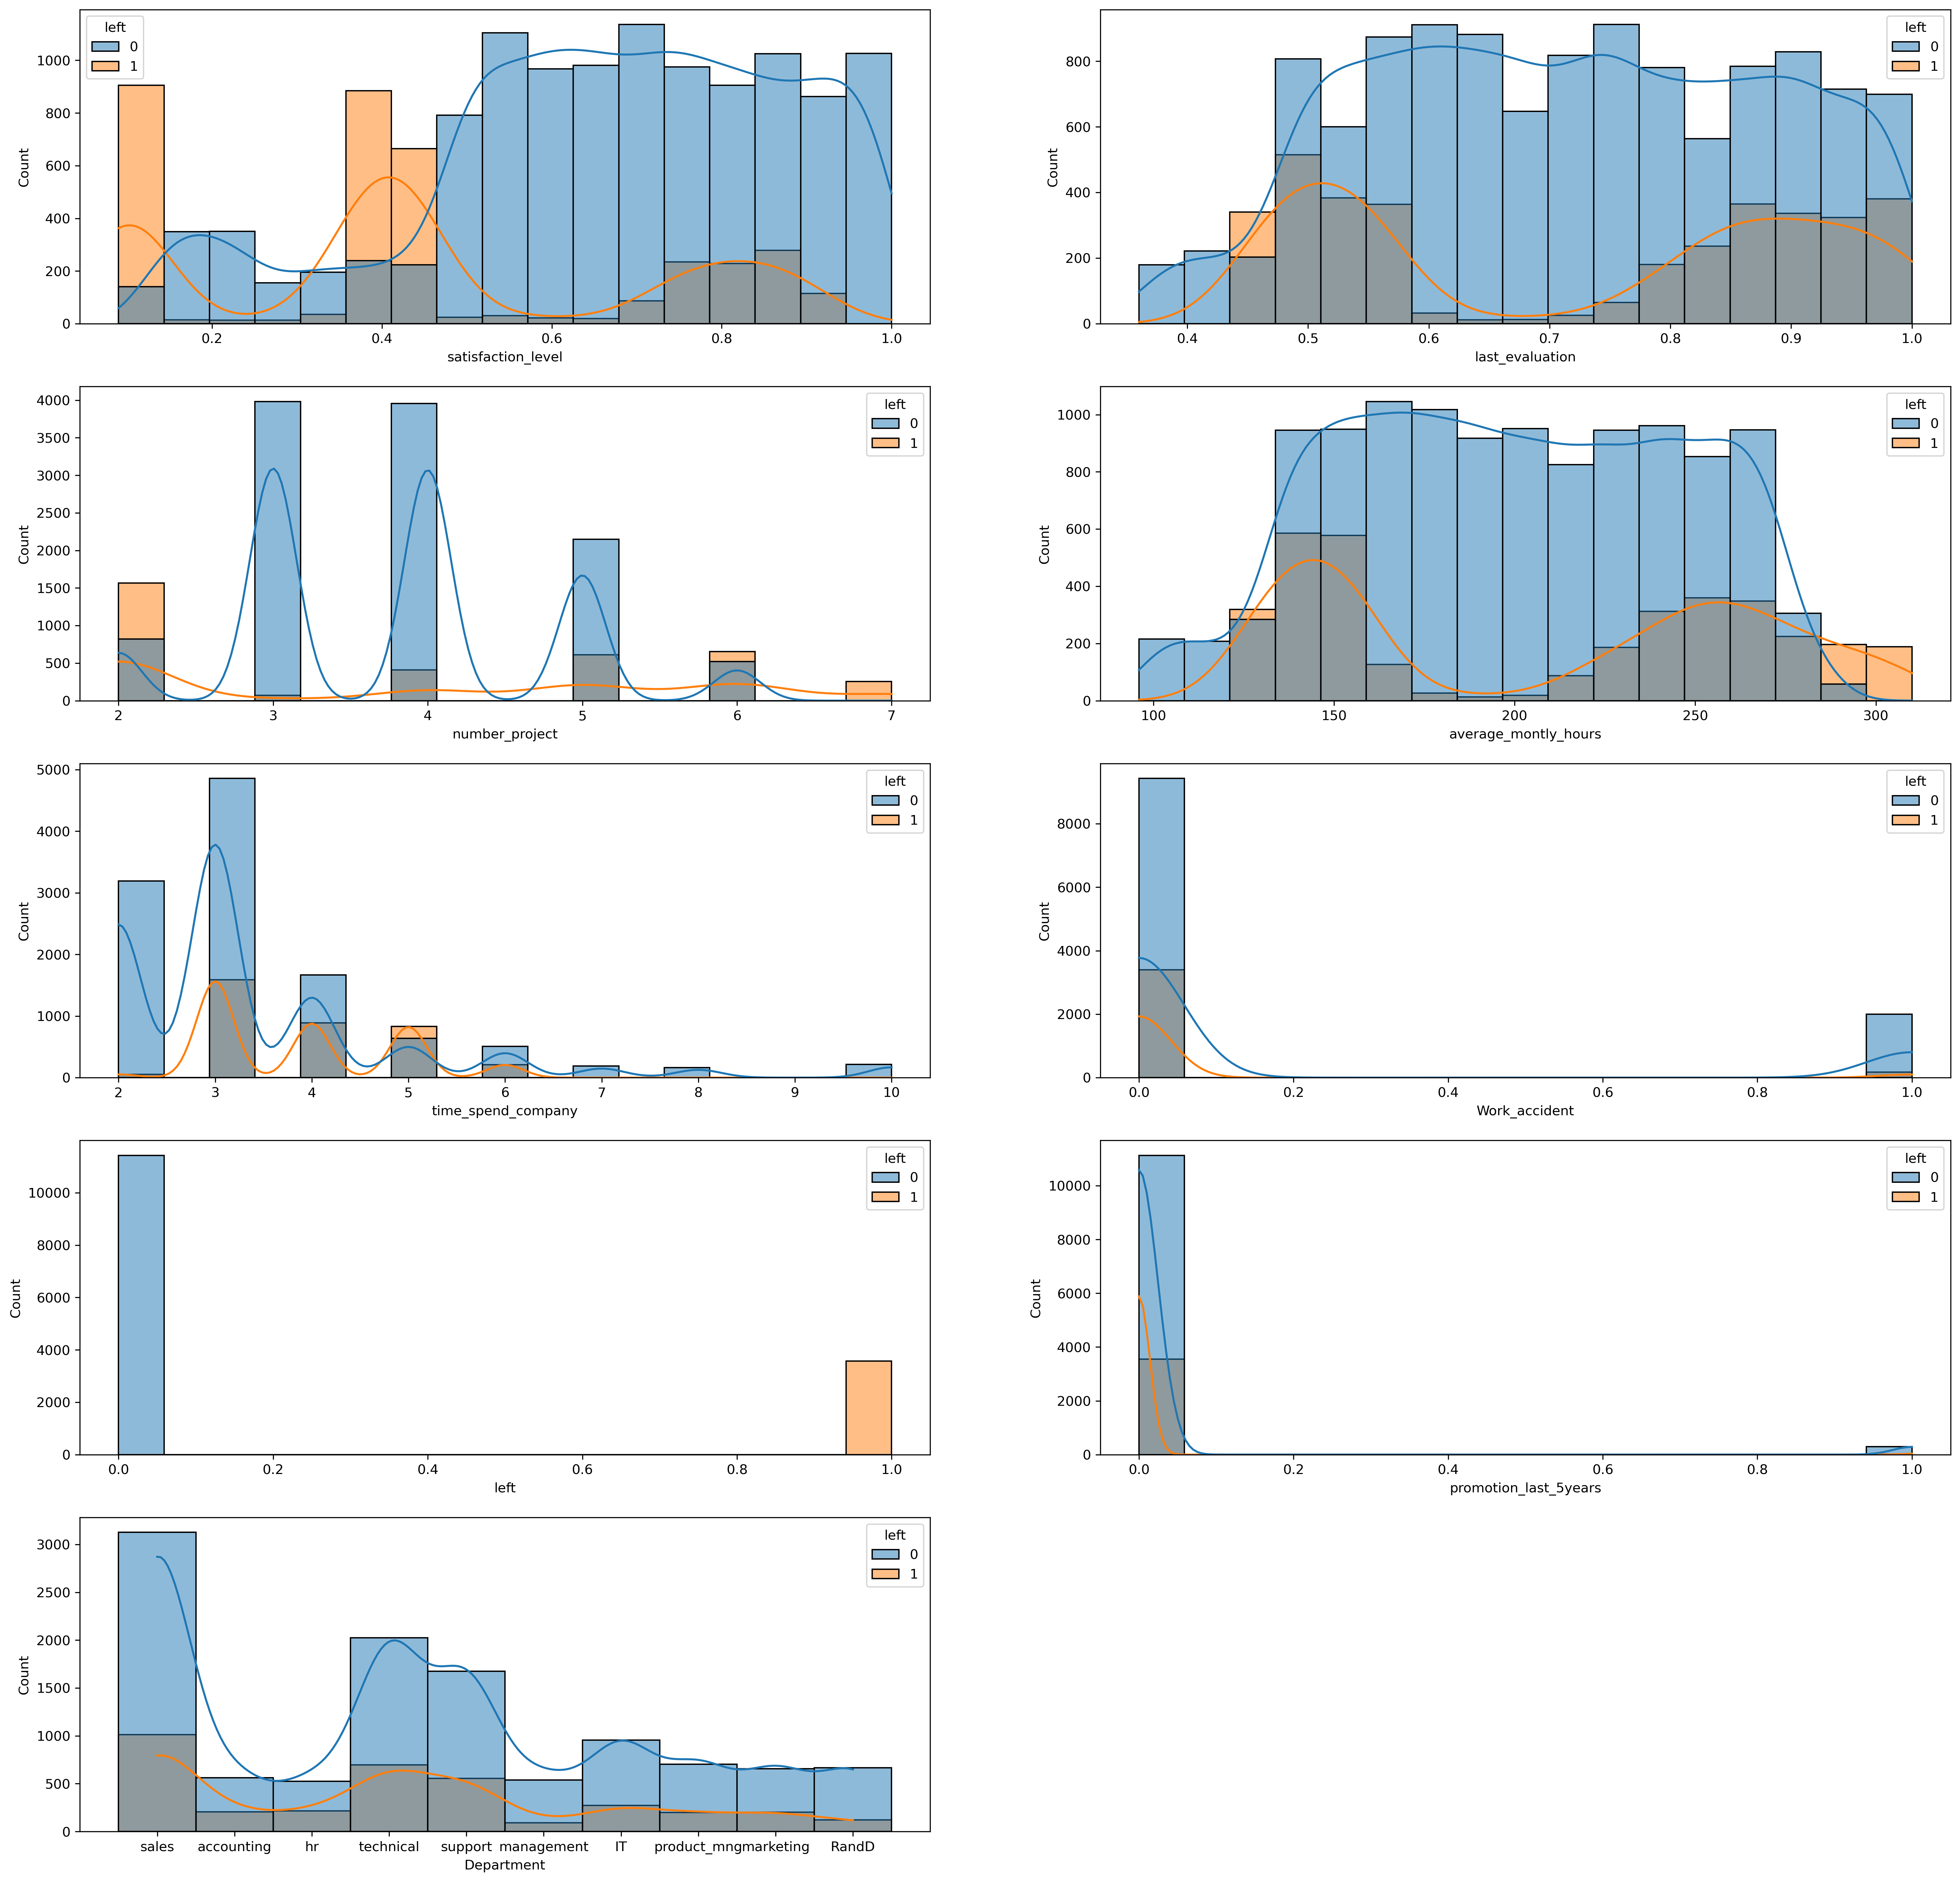

In [9]:
# Distribution of data

plt.figure(figsize=(25,25), dpi = 300)
for i in range (0,len(df.columns)-1):
    plt.subplot(5,2,i+1)
    sns.histplot(df, x=df.columns[i], hue=df.left, bins=17, kde=True)

<br>**Checking for Correlation of features**<br>

<AxesSubplot:>

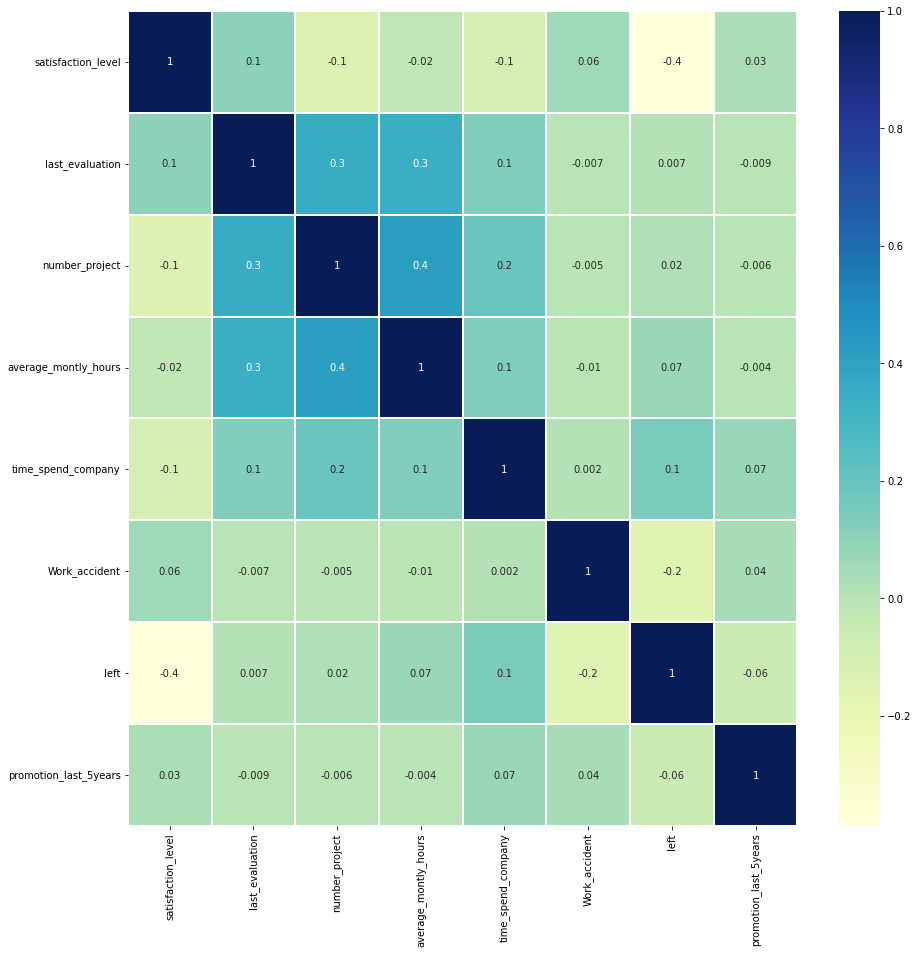

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt='.1g', linewidths=.3, cmap='YlGnBu')

<br>**One hot encoding**<br>

In [11]:
onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(df['Department'].values.reshape(-1,1)).toarray()

values = dict(df["Department"].value_counts())

for e , (val , _) in enumerate(values.items()):
    df[str(val)] = part[:,e]

df = df.drop(["Department"] , axis = 1)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales,technical,support,IT,product_mng,marketing,RandD,accounting,hr,management
0,0.38,0.53,2,157,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
onehotencoder = OneHotEncoder()
partt = onehotencoder.fit_transform(df['salary'].values.reshape(-1,1)).toarray()

values = dict(df["salary"].value_counts())

for e , (val , _) in enumerate(values.items()):
    df[str(val)] = part[:,e]

df = df.drop(["salary"] , axis = 1)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,technical,...,IT,product_mng,marketing,RandD,accounting,hr,management,low,medium,high
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<br>**Independent variables X**<br>

In [14]:
remaining_columns = list(df.columns)
remaining_columns.remove("left")
X = df[remaining_columns].values 
X

array([[0.38, 0.53, 2.  , ..., 0.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 0.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 0.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 0.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 0.  , 0.  ]])

<br>**Target variable Y**<br>

In [15]:
Y = df['left'].values.astype(np.uint8)
Y

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

<br>**Train / Test Split**<br>

In [16]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [17]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [18]:
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (11999, 20) (11999,)
Test set: (3000, 20) (3000,)


<br>**Check whether data is standardized or not**<br>

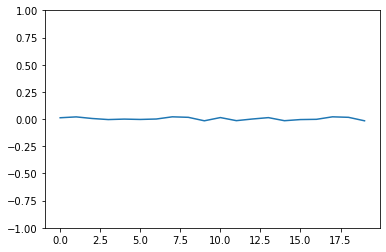

In [19]:
# Mean should be 1 

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(X_test[:,i]))
plt.plot(means , scaley=False)

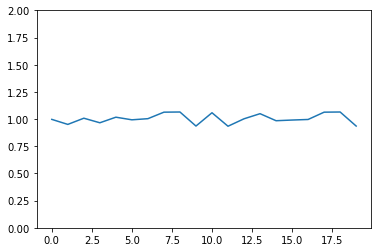

In [20]:
# Check variances 

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(X_test[:,i]))
plt.plot(vars)

<br>**Class Weights**<br>

In [21]:
# Finding class weights 

value_counts = dict(df["left"].value_counts())
print(value_counts)

{0: 11428, 1: 3571}


In [22]:
class_weights = {0 : 35.71 , 1 : 11.42}

In [23]:
model = LogisticRegression(class_weight=class_weights)
model.fit(X_train , Y_train)

predictions = model.predict(X_test)

[[2273   14]
 [ 710    3]]


<AxesSubplot:>

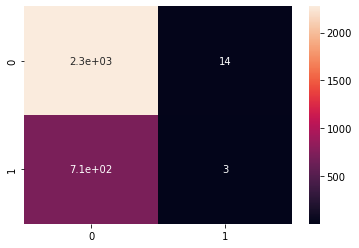

In [24]:
matrix = confusion_matrix(Y_test , predictions)
print(matrix)
sns.heatmap(matrix , annot=True)

<br>**Logistic Regression**<br>

In [25]:
# Creating object of Logistic Regression Class

model = LogisticRegression()
model.fit(X_train , Y_train)

predictions = model.predict(X_test)


model_w = LogisticRegression(class_weight=class_weights)
model_w.fit(X_train , Y_train)


LogisticRegression(class_weight={0: 35.71, 1: 11.42})

In [26]:
# Results

def Accuracy(Truths , Predictions):
    return np.mean(Truths == Predictions)

print("Accuracy score: " , Accuracy(Y_test , predictions))
print("Precision score : " , precision_score(Y_test , predictions))
print("Recall score: " , recall_score(Y_test , predictions))

Accuracy score:  0.767
Precision score :  0.5201149425287356
Recall score:  0.2538569424964937


<br>**KNN**<br>

In [27]:
test_scores = []
train_scores = []
n_range = list(range(1,10))

for i in n_range:

    # Creating object of KNN Class
    model_knn = KNeighborsClassifier(i)
    model_knn.fit(X_train,Y_train)
    
    train_scores.append(model.score(X_train,Y_train))
    test_scores.append(model.score(X_test,Y_test))

In [28]:
knn_model = KNeighborsClassifier(1).fit(X_train,Y_train)

In [29]:
print("KNN's Accuracy: ", metrics.accuracy_score(Y_test, knn_model.predict(X_test)))

KNN's Accuracy:  0.9753333333333334


In [30]:
print("\n \n Logistic Regression \n")
print(classification_report(Y_test, model.predict(X_test)))

print("K-Nearest Neighbour \n")
print(classification_report(Y_test,  knn_model.predict(X_test)))      


 
 Logistic Regression 

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2287
           1       0.52      0.25      0.34       713

    accuracy                           0.77      3000
   macro avg       0.66      0.59      0.60      3000
weighted avg       0.73      0.77      0.74      3000

K-Nearest Neighbour 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2287
           1       0.93      0.96      0.95       713

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



<br><h4 style="text-align:center;">Defining Metrics</h4><br>

In [31]:
pca = PCA(n_components = 7)
X = pca.fit_transform(X)

pca.explained_variance_ratio_.cumsum()

array([0.99815817, 0.99902739, 0.99950125, 0.99959716, 0.99966567,
       0.9997285 , 0.99977826])

In [32]:
def rmse_score(y_test , y_pred):
    value = (1/len(y_test))*np.sum((y_test - y_pred)**2)
    return np.sqrt(value)

def mae(y_test , y_pred):
    return (1/len(y_test))*np.sum(np.abs(y_test - y_pred))


<br>**Logistic Regression**<br>

 Average RMSE  0.5396167953729725


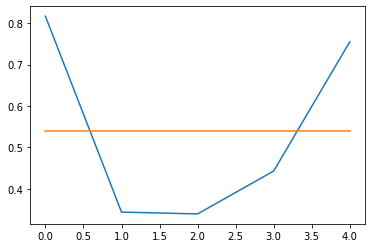

 Average MAE  24.51488385017228


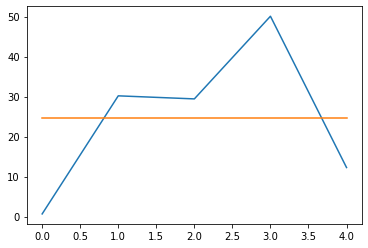

In [33]:
k_fold = KFold(n_splits=5)

# Plotting Root mean squared error 
rmse_scores = []
r2_scores = []
mae_scores = []
r2_adj_scores = []

for train_idx , test_idx in k_fold.split(X):
    X_train = X[train_idx]
    Y_train = Y[train_idx]

    X_test = X[test_idx]
    Y_test = Y[test_idx]

    model = LogisticRegression()
    model.fit(X_train , Y_train)
    
    X_train = Scaler.fit_transform(X_train)
    X_test = Scaler.transform(X_test)

    Y_pred = model.predict(X_test)
    rmse_scores.append(rmse_score(Y_test , Y_pred))
    mae_scores.append(mae(Y_test , Y_pred))

print(" Average RMSE " , np.mean(rmse_scores))
plt.plot(rmse_scores)
plt.plot([np.mean(rmse_scores)]*len(rmse_scores))
plt.show()

print(" Average MAE " , np.mean(mae_scores))
plt.plot(mae_scores)
plt.plot([np.mean(mae_scores)]*len(mae_scores))
plt.show()

<br>**KNN**<br>


 Average RMSE  0.2721971045342601


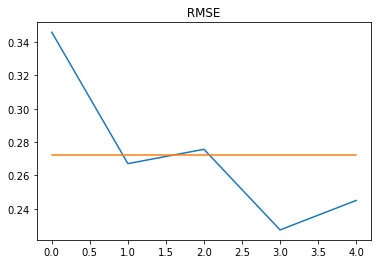

 
 Average MAE  11.38739597643659


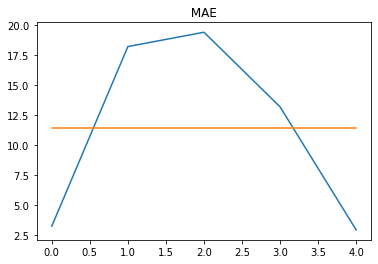

In [34]:
k_fold = KFold(n_splits=5)

# Plotting Root mean squared error 
rmse_scores = []
mae_scores = []

for train_idx , test_idx in k_fold.split(X):
    X_train = X[train_idx]
    Y_train = Y[train_idx]

    X_test = X[test_idx]
    Y_test = Y[test_idx]

    knn = KNeighborsClassifier()
    knn.fit(X_train , Y_train)

    Y_pred = knn.predict(X_test)
    rmse_scores.append(rmse_score(Y_test , Y_pred))
    mae_scores.append(mae(Y_test , Y_pred))
    
print("\n Average RMSE " , np.mean(rmse_scores))
plt.plot(rmse_scores)
plt.plot([np.mean(rmse_scores)]*len(rmse_scores))
plt.title(" RMSE ")
plt.show()

print(" \n Average MAE " , np.mean(mae_scores))
plt.plot(mae_scores)
plt.plot([np.mean(mae_scores)]*len(mae_scores))
plt.title(" MAE ")
plt.show()